# Team ID: 1097
# Flight Price Prediction- 1025

In [1]:
import pandas as pd

In [2]:
# Import the excel file
df = pd.read_excel('Flight_Fare.xlsx')
df1= pd.read_excel('Flight_Fare.xlsx')

In [3]:
df.head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


# Visualizations

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

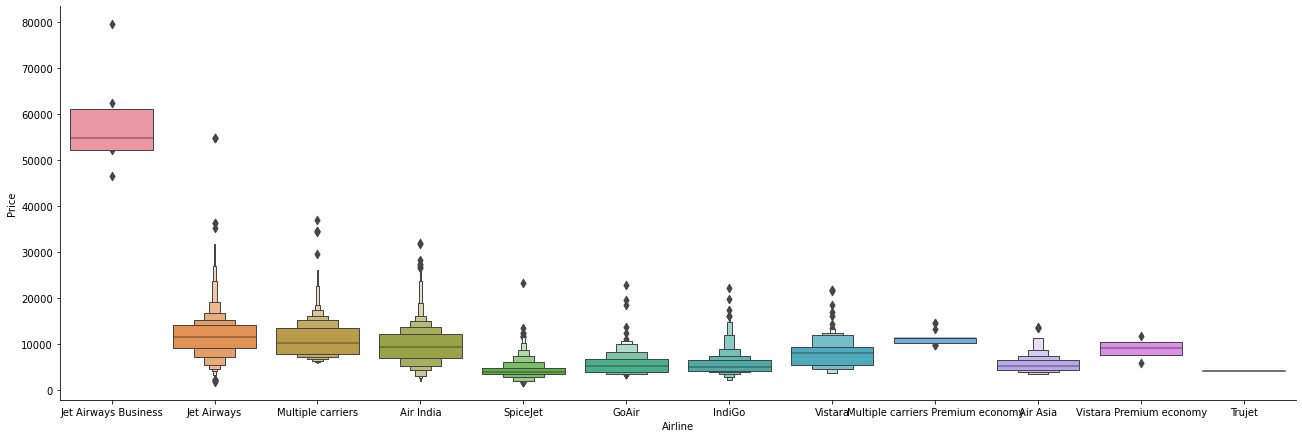

In [5]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

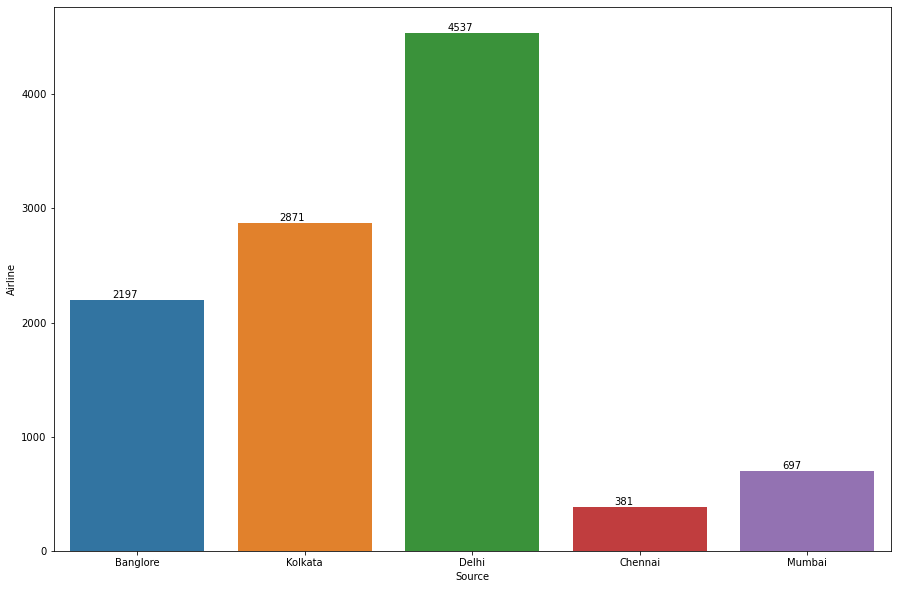

In [6]:
plt.figure(figsize = (15, 10))
ax=sns.countplot(x = df.Source , data = df)
plt.xlabel('Source')
plt.ylabel('Airline')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

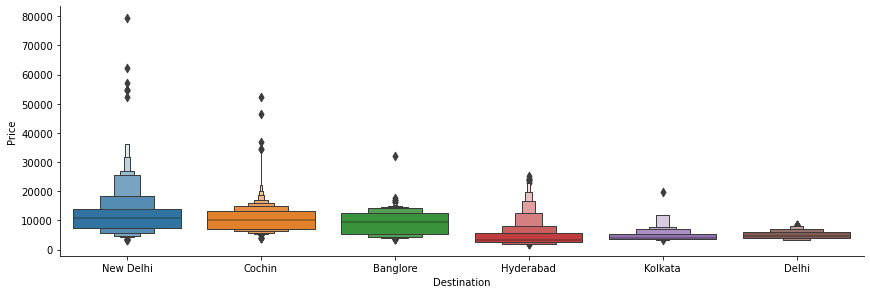

In [7]:

sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

# Feature Engineering

In [8]:
df.drop(labels=['Route','Additional_Info'], inplace = True, axis = 1)

## Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
df.Airline = le.fit_transform(df.Airline)
df.Source = le.fit_transform(df.Source)
df.Destination = le.fit_transform(df.Destination)

## Separating the Hours and Minutes into Different Columns

In [11]:
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  
        else:
            duration[i] = "0h " + duration[i]          

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))   
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   

In [12]:
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins
df.drop(["Duration"], axis = 1, inplace = True)

In [13]:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [14]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [15]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Total_Stops,Price,Duration_hours,Duration_mins,Arrival_hour,Arrival_min
0,3,24/03/2019,0,5,22:20,0.0,3897,2,50,1,10
1,1,1/05/2019,3,0,05:50,2.0,7662,7,25,13,15
2,4,9/06/2019,2,1,09:25,2.0,13882,19,0,4,25
3,3,12/05/2019,3,0,18:05,1.0,6218,5,25,23,30
4,3,01/03/2019,0,5,16:50,1.0,13302,4,45,21,35


In [16]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [17]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,Duration_hours,Duration_mins,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,3,24/03/2019,0,5,0.0,3897,2,50,1,10,22,20
1,1,1/05/2019,3,0,2.0,7662,7,25,13,15,5,50
2,4,9/06/2019,2,1,2.0,13882,19,0,4,25,9,25
3,3,12/05/2019,3,0,1.0,6218,5,25,23,30,18,5
4,3,01/03/2019,0,5,1.0,13302,4,45,21,35,16,50


In [18]:
df["Month"] = pd.to_datetime(df["Date_of_Journey"]).dt.month

In [19]:
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [20]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Duration_hours,Duration_mins,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Month
0,3,0,5,0.0,3897,2,50,1,10,22,20,3
1,1,3,0,2.0,7662,7,25,13,15,5,50,1
2,4,2,1,2.0,13882,19,0,4,25,9,25,9
3,3,3,0,1.0,6218,5,25,23,30,18,5,12
4,3,0,5,1.0,13302,4,45,21,35,16,50,1


## Converting the Hours to Minutes

In [21]:
def convert(hours):
    minutes = hours*60

    return minutes

In [22]:
df['Duration_hours'] = convert(df['Duration_hours'])
df['Arrival_hour'] = convert(df['Arrival_hour'])
df['Dep_hour'] = convert(df['Dep_hour'])


In [23]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Duration_hours,Duration_mins,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Month
0,3,0,5,0.0,3897,120,50,60,10,1320,20,3
1,1,3,0,2.0,7662,420,25,780,15,300,50,1
2,4,2,1,2.0,13882,1140,0,240,25,540,25,9
3,3,3,0,1.0,6218,300,25,1380,30,1080,5,12
4,3,0,5,1.0,13302,240,45,1260,35,960,50,1


In [24]:
df['Departure'] = df['Dep_hour'] + df['Dep_min']
df['Duration'] = df['Duration_hours'] + df['Duration_mins']
df['Arrival'] = df['Arrival_hour'] + df['Arrival_min']

In [25]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Duration_hours,Duration_mins,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Month,Departure,Duration,Arrival
0,3,0,5,0.0,3897,120,50,60,10,1320,20,3,1340,170,70
1,1,3,0,2.0,7662,420,25,780,15,300,50,1,350,445,795
2,4,2,1,2.0,13882,1140,0,240,25,540,25,9,565,1140,265
3,3,3,0,1.0,6218,300,25,1380,30,1080,5,12,1085,325,1410
4,3,0,5,1.0,13302,240,45,1260,35,960,50,1,1010,285,1295


In [26]:
df.drop(["Duration_hours","Duration_mins","Arrival_hour","Arrival_min","Dep_min","Dep_hour"], axis = 1, inplace = True)

In [27]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Month,Departure,Duration,Arrival
0,3,0,5,0.0,3897,3,1340,170,70
1,1,3,0,2.0,7662,1,350,445,795
2,4,2,1,2.0,13882,9,565,1140,265
3,3,3,0,1.0,6218,12,1085,325,1410
4,3,0,5,1.0,13302,1,1010,285,1295


In [28]:
df.dtypes

Airline          int32
Source           int32
Destination      int32
Total_Stops    float64
Price            int64
Month            int64
Departure        int64
Duration         int64
Arrival          int64
dtype: object

In [29]:
df.dropna(inplace = True)

In [30]:
df.isnull().sum()

Airline        0
Source         0
Destination    0
Total_Stops    0
Price          0
Month          0
Departure      0
Duration       0
Arrival        0
dtype: int64

In [31]:
df['Total_Stops'] = df['Total_Stops'].astype(int)

In [32]:
df.dtypes

Airline        int32
Source         int32
Destination    int32
Total_Stops    int32
Price          int64
Month          int64
Departure      int64
Duration       int64
Arrival        int64
dtype: object

# Separating Predictors and Targets

In [33]:
X = df.loc[: , ['Airline','Source','Destination','Total_Stops','Month','Departure','Duration','Arrival']]
y = df.Price

# Train , test and split

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state = 5)

# Model Building

In [35]:
from xgboost import XGBRegressor

In [36]:
model = XGBRegressor(verbosity = 1, n_estimators = 100, max_depth = 5,learning_rate=0.3)

In [37]:
model.fit(X_train , y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [38]:
y_predict=model.predict(X_test)

C:\Users\Tejaswini C A\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


# Evaluation

In [39]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.7822254915405167

## Test Results for XGBoost Regressor Model:
## R-squared:  0.7822254915405167

In [40]:
import numpy as np

C:\Users\Tejaswini C A\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


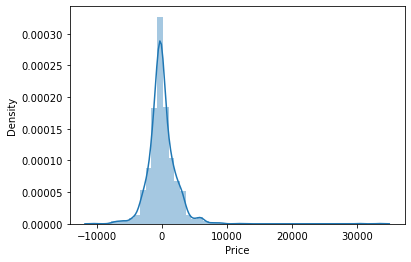

In [41]:
sns.distplot(y_test-y_predict)
plt.show()

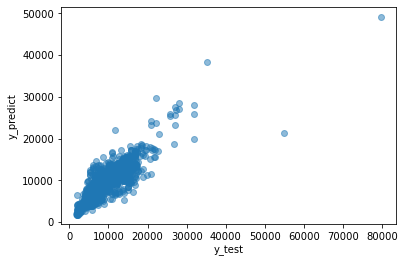

In [42]:
plt.scatter(y_test, y_predict, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_predict")
plt.show()

# Hyperparameter Tuning

In [43]:
from sklearn.model_selection import RandomizedSearchCV

## Xgboost 

In [44]:
tuned_params = {
    'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]
}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [45]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

C:\Users\Tejaswini C A\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [46]:
print("Test Results for XGBoost Regressor Model:")

print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for XGBoost Regressor Model:
R-squared:  0.7833739580073337


### Test Results for XGBoost Regressor Model:
### R-squared:  0.7785716146151063

# Random forest Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_absolute_error')

In [49]:
y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)

In [50]:
print("Test Results for Random Forest Regressor Model:")
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Random Forest Regressor Model:
R-squared:  0.755789445268807


### Test Results for Random Forest Regressor Model:
### R-squared:  0.7590843796244948

# Re-processing the data to increase the Accuracy.

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1.Airline = le.fit_transform(df1.Airline)
df1.Source = le.fit_transform(df1.Source)
df1.Destination = le.fit_transform(df1.Destination)
#df1.Route = le.fit_transform(df1.Route)
df1.Additional_Info = le.fit_transform(df1.Additional_Info)

duration = list(df1["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  
        else:
            duration[i] = "0h " + duration[i]          

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))   
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))  
df1["Duration_hours"] = duration_hours
df1["Duration_mins"] = duration_mins
df1.drop(["Duration"], axis = 1, inplace = True)

In [52]:
df1["Arrival_hour"] = pd.to_datetime(df1.Arrival_Time).dt.hour
df1["Arrival_min"] = pd.to_datetime(df1.Arrival_Time).dt.minute
df1.drop(["Arrival_Time"], axis = 1, inplace = True)

In [53]:
df1["Dep_hour"] = pd.to_datetime(df1["Dep_Time"]).dt.hour
df1["Dep_min"] = pd.to_datetime(df1["Dep_Time"]).dt.minute
df1.drop(["Dep_Time"], axis = 1, inplace = True)

In [54]:
df1.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [55]:
df1["Month"] = pd.to_datetime(df1["Date_of_Journey"]).dt.month

In [56]:
df1.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [57]:
df1.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_hours,Duration_mins,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Month
0,3,0,5,BLR → DEL,0.0,8,3897,2,50,1,10,22,20,3
1,1,3,0,CCU → IXR → BBI → BLR,2.0,8,7662,7,25,13,15,5,50,1
2,4,2,1,DEL → LKO → BOM → COK,2.0,8,13882,19,0,4,25,9,25,9
3,3,3,0,CCU → NAG → BLR,1.0,8,6218,5,25,23,30,18,5,12
4,3,0,5,BLR → NAG → DEL,1.0,8,13302,4,45,21,35,16,50,1


In [58]:
X1 = df1.loc[: , ['Total_Stops', 'Duration_hours','Additional_Info', 'Airline','Source','Destination', 'Month','Dep_hour','Dep_min','Arrival_hour','Arrival_min']]
y1 = df1.Price

In [59]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.20,random_state = 5)

In [60]:
model1 = XGBRegressor(verbosity = 1, n_estimators = 100, max_depth = 5,learning_rate=0.3)

In [61]:
model1.fit(X_train1 , y_train1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [62]:
y_predict1=model1.predict(X_test1)

C:\Users\Tejaswini C A\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [63]:
from sklearn.metrics import r2_score
r2_score(y_test1,y_predict1)
print("Test Results for Random Forest Regressor Model:")
print("R-squared: ", r2_score(y_test1, y_predict1))

Test Results for Random Forest Regressor Model:
R-squared:  0.8416810277763116


## Test Results for Random Forest Regressor Model:
## R-squared:  0.8416810277763116

# Conclusion: We found the more we pre process this data the higher the accuracy was achieved.